In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import random
from sklearn.manifold import TSNE

## 1. Loading Data 

In [45]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Considering 40K data

In [46]:
print(df.head())
df = df[:40000]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

We have 28x28 px images flattened into 784 px per datapoint. hence for each datapoint we have 784 columns. 
label field is the class attribute for which numeric digit this image belongs to. 

In [47]:
"Seperating labels and feature vectors"
label = df.label
data = df.drop('label', axis = 1)

## 2. Visualizing Data 
Making this function to show random datapoint and it corresponding value. 

In [48]:
def print_index(id):
    idx = id
    grid_data = data.iloc[idx].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = None, cmap = 'gray')
    plt.title(label[idx])

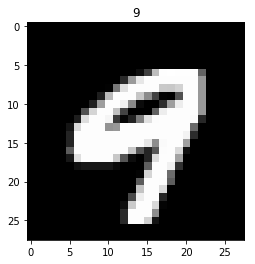

In [49]:
print_index(random.randint(0, 1000)) 

## 3. Column Standardization : 
Data preprocessing such that the mean of each feature vector lies at the origin and standard deviation of each feature vector is 1. 

In [50]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(40000, 784)


C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 4. PCA Mathematics : 
1. Finding Co variance matrix for the fiven feature matrix as X<sup>T</sup>X.
2. Since we are going from 784 dimensions to 2 dimensions, we only need highest 2 eigen values and vectors(V). 
3. Data matrix in 2 dimensions will be equal to X<sup>'</sup><sub>i</sub> = X<sup>T</sup><sub>i</sub>V.

In [51]:
cov_matrix = np.dot(standardized_data.T, standardized_data)
values, vectors = eigh(cov_matrix, eigvals = (782, 783))
new_data = np.dot(vectors.T, standardized_data.T)
print(new_data.shape)
xdash = np.vstack((new_data, label)).T
print(xdash.shape)

(2, 40000)
(40000, 3)


## 4. Visualizing in 2D space. 

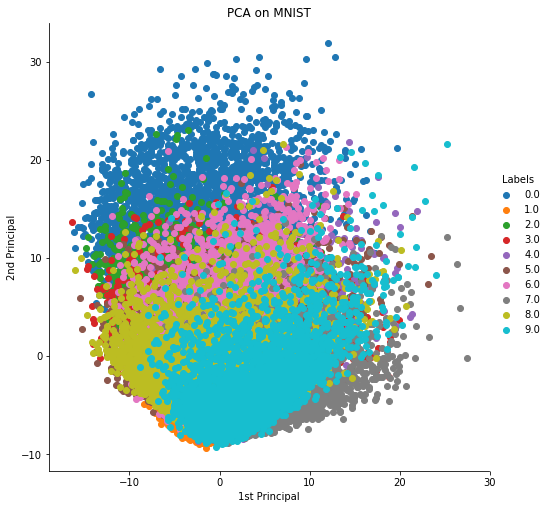

In [52]:
df = pd.DataFrame(data = xdash, columns = ('1st Principal', '2nd Principal', 'Labels'))
sns.FacetGrid(df, hue = 'Labels', height = 7).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.title('PCA on MNIST')
plt.show()

## 6. t-SNE :
t-SNE, stands for t distribution Stochastic Neighborhood Embedding, is a state of the art technique used tor dimensionality reduction and visualizing higher dimension data easily. 

# For Perplexity 50

In [53]:
model = TSNE(n_components = 2, random_state = 0, perplexity=50)
tsne_model = model.fit_transform(standardized_data)

In [54]:
tsne_data = np.vstack((tsne_model.T, label)).T
# tsne_data.shape
# labels.shape
tse_df = pd.DataFrame(data= tsne_data, columns=('Dim_1', 'Dim_2', 'Labels'))

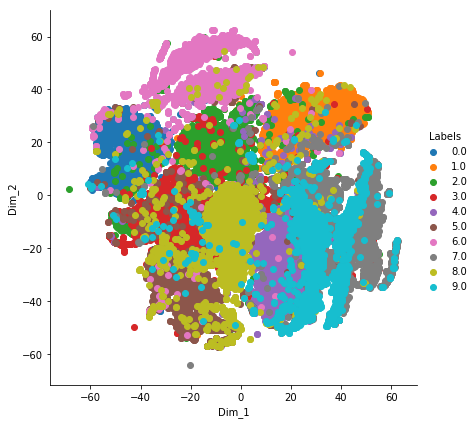

In [55]:
sns.FacetGrid(tse_df, hue = 'Labels', height = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

It is visible that t-SNE performs much better dimensionality reduction as the clusters formed in PCA are very sparse but in t-SNE they are much closer.

# For Perplexity 100

In [56]:
model = TSNE(n_components = 2, random_state = 0, perplexity=100)
tsne_model = model.fit_transform(standardized_data)

In [57]:
tsne_data = np.vstack((tsne_model.T, label)).T
# tsne_data.shape
# labels.shape
tse_df = pd.DataFrame(data= tsne_data, columns=('Dim_1', 'Dim_2', 'Labels'))

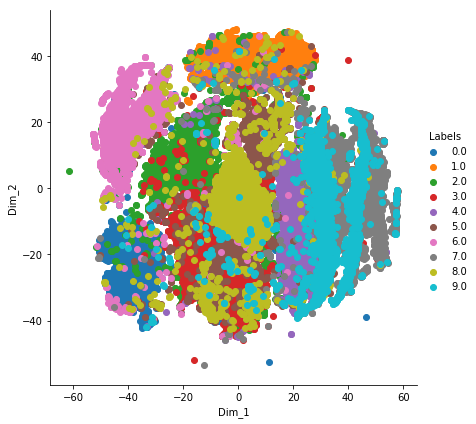

In [58]:
sns.FacetGrid(tse_df, hue = 'Labels', height = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# For perplexity 40

In [59]:
model = TSNE(n_components = 2, random_state = 0, perplexity=40)
tsne_model = model.fit_transform(standardized_data)

In [60]:
tsne_data = np.vstack((tsne_model.T, label)).T
# tsne_data.shape
# labels.shape
tse_df = pd.DataFrame(data= tsne_data, columns=('Dim_1', 'Dim_2', 'Labels'))

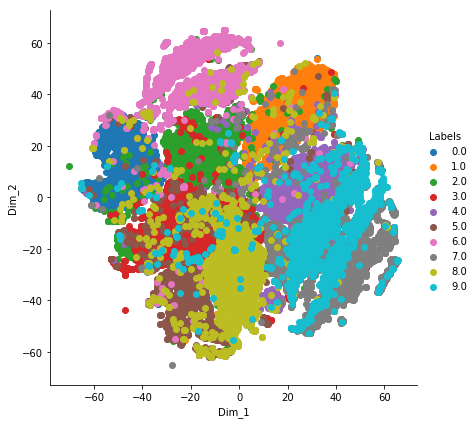

In [61]:
sns.FacetGrid(tse_df, hue = 'Labels', height = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# For perplexity 30

In [64]:
model = TSNE(n_components = 2, random_state = 0, perplexity=30)
tsne_model = model.fit_transform(standardized_data)

In [65]:
tsne_data = np.vstack((tsne_model.T, label)).T
# tsne_data.shape
# labels.shape
tse_df = pd.DataFrame(data= tsne_data, columns=('Dim_1', 'Dim_2', 'Labels'))

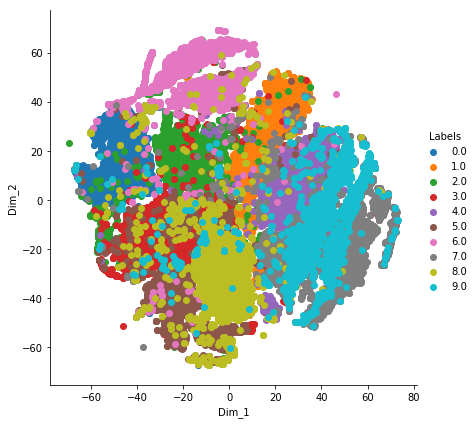

In [66]:
sns.FacetGrid(tse_df, hue = 'Labels', height = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()